In [4]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [5]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-11-10 17:20:58--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   344MB/s    in 0.2s    

2023-11-10 17:20:58 (344 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [6]:
# melakukan ekstralsi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [7]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [8]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range =0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, #karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode='binary'
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode ='binary'
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [17]:
# compile model bagian dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 16s - loss: 0.7621 - accuracy: 0.5600 - val_loss: 0.7147 - val_accuracy: 0.5000 - 16s/epoch - 626ms/step
Epoch 2/20
25/25 - 13s - loss: 0.6827 - accuracy: 0.5600 - val_loss: 0.6984 - val_accuracy: 0.5000 - 13s/epoch - 516ms/step
Epoch 3/20
25/25 - 13s - loss: 0.6931 - accuracy: 0.5500 - val_loss: 0.6523 - val_accuracy: 0.9500 - 13s/epoch - 521ms/step
Epoch 4/20
25/25 - 14s - loss: 0.6818 - accuracy: 0.5600 - val_loss: 0.6808 - val_accuracy: 0.5000 - 14s/epoch - 565ms/step
Epoch 5/20
25/25 - 15s - loss: 0.7149 - accuracy: 0.4900 - val_loss: 0.6867 - val_accuracy: 0.5000 - 15s/epoch - 586ms/step
Epoch 6/20
25/25 - 13s - loss: 0.6690 - accuracy: 0.5900 - val_loss: 0.6856 - val_accuracy: 0.5000 - 13s/epoch - 506ms/step
Epoch 7/20
25/25 - 13s - loss: 0.7895 - accuracy: 0.6200 - val_loss: 0.5170 - val_accuracy: 0.8000 - 13s/epoch - 521ms/step
Epoch 8/20
25/25 - 13s - loss: 0.6804 - accuracy: 0.5400 - val_loss: 0.6639 - val_accuracy: 0.6500 - 13s/epoch - 522ms/step
Epoch 9/

Saving chaos-227971_1920.jpg to chaos-227971_1920 (2).jpg
1/1 [==============================] - 0s 141ms/step
chaos-227971_1920 (2).jpg
messy


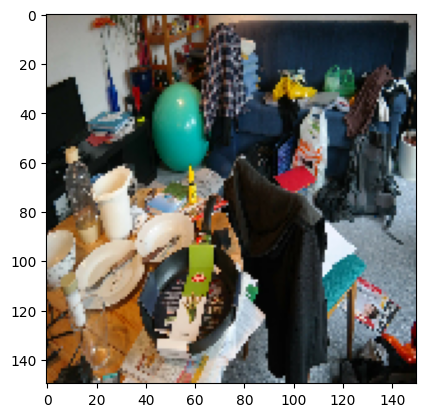

In [21]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')